In [1]:
# Import necessary classes from the scripts
from scripts.sentimental_analysis import SentimentAnalyzer
from scripts.data_loader import load_news_data

In [2]:
# Load the news data
file_path = "../src/data/stock_news_data/raw_analyst_ratings.csv"
news_data = load_news_data(file_path)

In [3]:
# Initialize the SentimentAnalyzer class and perform sentiment analysis
sentiment_analyzer = SentimentAnalyzer(news_data)

In [4]:
news_data = sentiment_analyzer.perform_sentiment_analysis()

In [9]:
# Display the sentiment analysis results
news_data.head()


,Unnamed: 0,headline,url,publisher,stock,sentiment,sentiment_category
date,,,,,,,
2020-06-05 10:30:54-04:00,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.0,neutral
2020-06-03 10:45:20-04:00,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.0,neutral
2020-05-26 04:30:07-04:00,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.0,neutral
2020-05-22 12:45:06-04:00,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.0,neutral
2020-05-22 11:38:59-04:00,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.0,neutral


In [6]:
# Extract the most common keywords from the headlines
keywords = sentiment_analyzer.extract_keywords(max_features=10)
keywords

array(['earnings', 'eps', 'est', 'market', 'reports', 'sales', 'shares',
       'stocks', 'update', 'vs'], dtype=object)

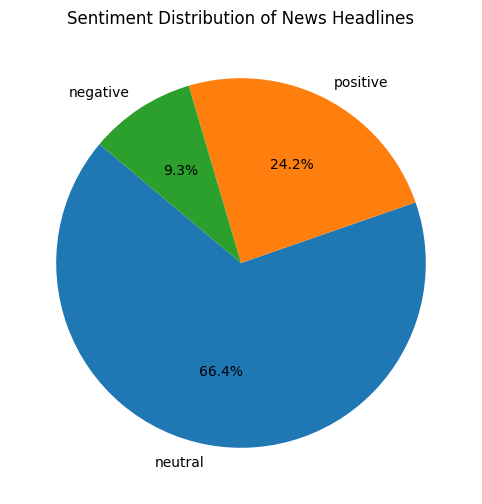

In [7]:
# Perform sentiment analysis on category using pie chart
sentiment_analyzer.pi_chart_sentiment_distribution()

In [8]:
# Plot publisher activity
sentiment_analyzer.plot_publisher_activity()

KeyError: 'date'

In [9]:
# Display the sentiment analysis results by publisher
sentiment_summary = sentiment_analyzer.calculate_publisher_sentiment()

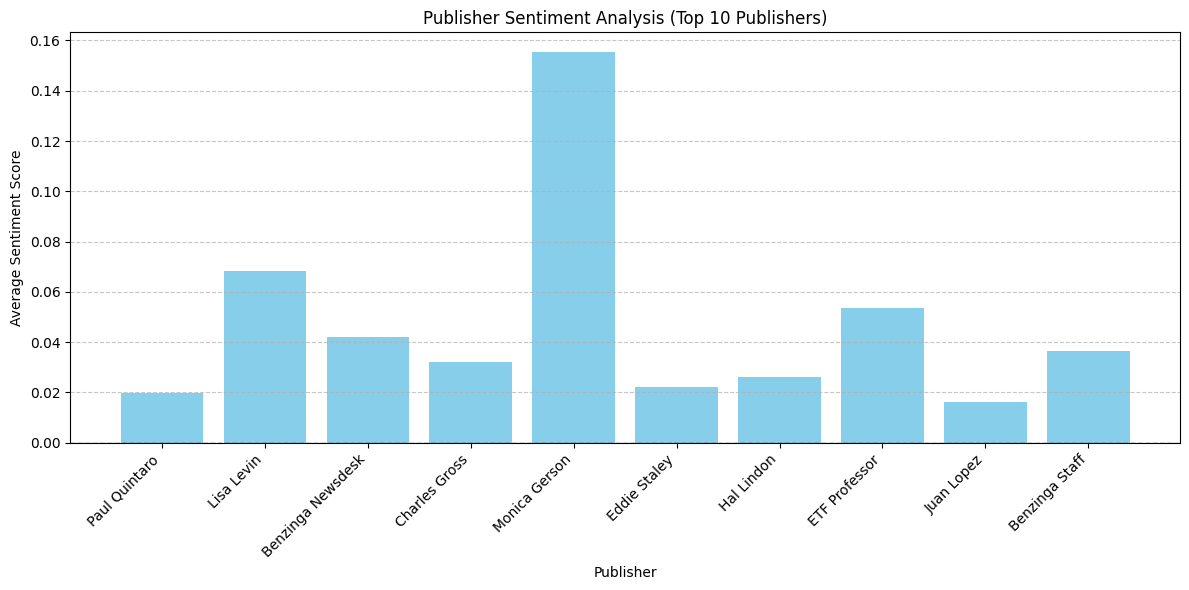

In [10]:
# Display the sentiment analysis results by publisher
sentiment_analyzer.plot_publisher_sentiment(sentiment_summary)